# Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np

In [2]:
df = pd.read_csv("data/toydataset.csv", header=None)
df

,0,1,2
0,apple,banana,carrot
1,banana,NaN,NaN
2,apple,NaN,NaN
3,apple,carrot,diet coke
4,banana,carrot,NaN
5,banana,carrot,NaN


There are a total six transactions in the dataset

In [3]:
df = df.fillna('')
df

,0,1,2
0,apple,banana,carrot
1,banana,,
2,apple,,
3,apple,carrot,diet coke
4,banana,carrot,
5,banana,carrot,


In [4]:
data = df.values.tolist()
data

[['apple', 'banana', 'carrot'],
 ['banana', '', ''],
 ['apple', '', ''],
 ['apple', 'carrot', 'diet coke'],
 ['banana', 'carrot', ''],
 ['banana', 'carrot', '']]

In [5]:
data = [ filter(None, a) for a in data ]
data

[['apple', 'banana', 'carrot'],
 ['banana'],
 ['apple'],
 ['apple', 'carrot', 'diet coke'],
 ['banana', 'carrot'],
 ['banana', 'carrot']]

# Network Visualization

We will use **networkx**, ptyhon package for network analysis.

Before installing, let's check if the package is already in your machine by typing in **conda list networkx**
- If the packge is not found, then **pip install networkx**
- If the package is found, then **pip install --upgrade networkx**

### First, transform data into edgelists

In [6]:
for i in data:
    print i

['apple', 'banana', 'carrot']
['banana']
['apple']
['apple', 'carrot', 'diet coke']
['banana', 'carrot']
['banana', 'carrot']


In [7]:
from itertools import combinations

nodes = [x for d in data for x in combinations(d, 2)]
nodes

[('apple', 'banana'),
 ('apple', 'carrot'),
 ('banana', 'carrot'),
 ('apple', 'carrot'),
 ('apple', 'diet coke'),
 ('carrot', 'diet coke'),
 ('banana', 'carrot'),
 ('banana', 'carrot')]

In [8]:
# You could generate a csv file and do network visualization using Gephi

df = pd.DataFrame(nodes)
df.to_csv("data/networkvisualization.csv", index=False, header=None)

### Gephic 
Gephi is an advanced network visualization software (free, opensource).
You can download Gephi from https://gephi.org/users/download/

<img src = "images\network.png">

### Now, network analysis using Python package

In [9]:
#https://stackoverflow.com/questions/16828493/how-to-draw-a-graph-with-duplicate-edges-in-networkx-in-python

import networkx as nx
G = nx.MultiGraph()

In [10]:
G.add_edges_from(nodes)

In [11]:
from collections import Counter
c = Counter(G.edges())  # Contains frequencies of each directed edge.
c

Counter({('apple', 'banana'): 1,
         ('carrot', 'apple'): 2,
         ('carrot', 'banana'): 3,
         ('diet coke', 'apple'): 1,
         ('diet coke', 'carrot'): 1})

In [12]:
#https://stackoverflow.com/questions/43644210/python-networkx-add-weights-to-edges-by-frequency-of-edge-occurance

from collections import Counter
c = Counter(G.edges())  # Contains frequencies of each directed edge.

for u, v, d in G.edges(data=True):
    d['weight'] = c[u, v]

print(list(G.edges(data=True)))

[('diet coke', 'carrot', {'weight': 1}), ('diet coke', 'apple', {'weight': 1}), ('carrot', 'apple', {'weight': 2}), ('carrot', 'apple', {'weight': 2}), ('carrot', 'banana', {'weight': 3}), ('carrot', 'banana', {'weight': 3}), ('carrot', 'banana', {'weight': 3}), ('apple', 'banana', {'weight': 1})]


/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


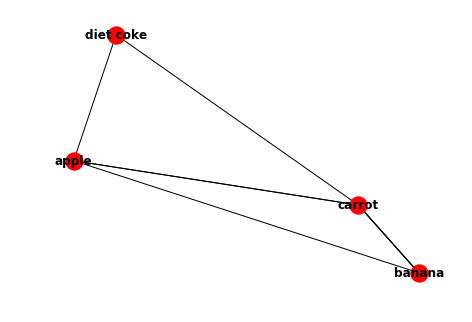

In [13]:
# does not show edge thickness
nx.draw(G, with_labels=True, font_weight='bold')

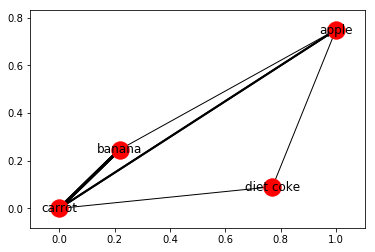

In [14]:
# shows edge thickness
# https://stackoverflow.com/questions/43644210/python-networkx-add-weights-to-edges-by-frequency-of-edge-occurance

nx.draw_networkx(G, width=[d['weight'] for _, _, d in G.edges(data=True)])

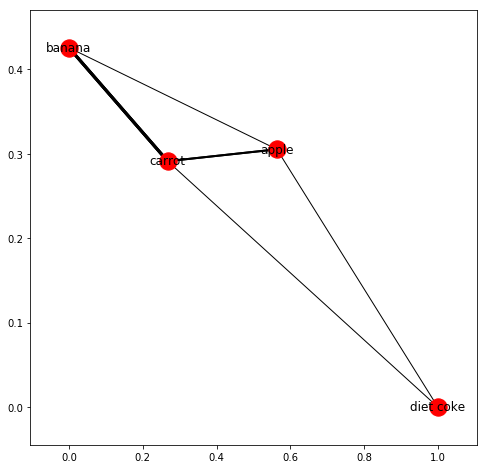

In [15]:
# shows edge thickness
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

nx.draw_networkx(G, width=[d['weight'] for _, _, d in G.edges(data=True)])